In [1]:
#### The data consists of credit card transactions . Some of these are fraudelent.
#### The objective is to identify frauds as best as possible.

In [2]:
## importing commoon libraries and loading the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_csv("fraud_detection.csv")

In [5]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#### Analysis of data suggests 
#### data is complete with no missing values.
#### data is unscaled
#### data is unbalanced (highly skewed) and the +ve class for the target is very small
#### therefore accuracy is not a good measure of model effectiveness
#### we will therefore use f1_score to measure effectiveness of model.

In [8]:
#### Creating simple base models
x=raw_data.iloc[:,0:-1]
y=raw_data.iloc[:,-1]
x.shape , y.shape

((284807, 30), (284807,))

In [9]:
# Separating the train test data and standardization of the train data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle='True' ,stratify =y )
scaler = StandardScaler()
x_scld_train = scaler.fit_transform(x_train)

In [10]:
# Fitting svm model
from sklearn.linear_model import SGDClassifier

In [11]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score , cross_val_predict

In [12]:
sgd1 = SGDClassifier(random_state = 100 , penalty='l2' , loss='hinge')
skf = StratifiedKFold(n_splits=5)

In [13]:
cross_val_score(sgd1, x_scld_train, y_train , cv=skf, scoring='f1')

array([0.67716535, 0.66666667, 0.72058824, 0.72307692, 0.71212121])

In [14]:
pd.DataFrame(confusion_matrix(y_train,cross_val_predict(sgd1,x_scld_train,y_train,cv=skf)))

,0,1
0,227420,31
1,165,229


In [20]:
# comparing result with test data

In [21]:
pd.DataFrame(confusion_matrix(y_test,cross_val_predict(sgd1,scaler.transform(x_test),y_test,cv=skf)))

,0,1
0,56852,12
1,49,49


In [ ]:
#### svm has performed quite poorly.
#### test results indicate significant difference from training results

In [15]:
# fitting random forest for comparison
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf1= RandomForestClassifier(random_state = 100, n_estimators = 100)
rf1.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [18]:
f1_score(y_train,rf1.predict(x_train))

1.0

In [19]:
pd.DataFrame(confusion_matrix(y_train,rf1.predict(x_train)))

,0,1
0,227451,0
1,0,394


In [22]:
# comparing result with test data
pd.DataFrame(confusion_matrix(y_test,rf1.predict(x_test)))

,0,1
0,56860,4
1,16,82


In [23]:
#### random forest model has clearly overfitted the train data 

In [24]:
####lets simplify the data by reducing 
#### a. complexity of data, b. volume of non fraud data

In [27]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [29]:
col =['Class','Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount' ]

In [32]:
corr_data = raw_data[col]

In [33]:
corr_data.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [34]:
# running correlation analysis to see if features are relevant
pd.DataFrame(corr_data.corr().round(3))

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,1.000,-0.012,-0.101,0.091,-0.193,0.133,-0.095,-0.044,-0.187,0.020,...,0.020,0.040,0.001,-0.003,-0.007,0.003,0.004,0.018,0.010,0.006
Time,-0.012,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,...,-0.051,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.011
V1,-0.101,0.117,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,...,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.228
V2,0.091,-0.011,0.000,1.000,0.000,-0.000,-0.000,0.000,0.000,0.000,...,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.531
V3,-0.193,-0.420,-0.000,0.000,1.000,0.000,-0.000,-0.000,0.000,-0.000,...,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.211
V4,0.133,-0.105,-0.000,-0.000,0.000,1.000,-0.000,0.000,0.000,0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.099
V5,-0.095,0.173,-0.000,-0.000,-0.000,-0.000,1.000,-0.000,0.000,-0.000,...,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.386
V6,-0.044,-0.063,-0.000,0.000,-0.000,0.000,-0.000,1.000,-0.000,-0.000,...,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.216
V7,-0.187,0.085,-0.000,0.000,0.000,0.000,0.000,-0.000,1.000,0.000,...,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.397
V8,0.020,-0.037,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,1.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.103


In [35]:
#### let us drop columns where corelation is within the range of +-2%
#### visual display of sample of 2 features in both categories to see difference

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

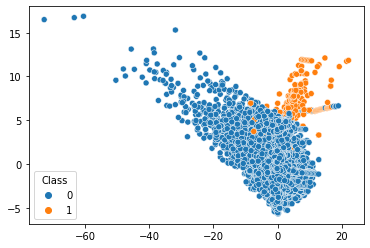

In [36]:
sns.scatterplot(raw_data.values[:,2],raw_data.values[:,4],hue=raw_data['Class'] )

In [ ]:
#### here we can clearly see concentration of data for the 2 values of the target

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

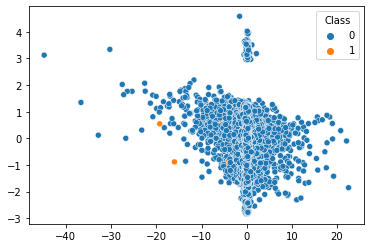

In [37]:
sns.scatterplot(raw_data.values[:,23],raw_data.values[:,24],hue=raw_data['Class'] )

In [ ]:
#### here we do not see any pattern. clearly we can consider eliminating these features
#### column numbers identified for removal 0,8,13,15,23,24,25,26,27,28,29

In [38]:
relevant_data =raw_data.drop(raw_data.columns[[0,8,13,15,23,24,25,26,27,28,29]], axis=1)
relevant_data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V22,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,0


In [39]:
relevant_data.reset_index()

,index,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V22,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,0
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,0
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,0
284803,284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0
284804,284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,0
284805,284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,0


In [40]:
# reducing imbalance of data while training model
# replicating the split
train_data2 , test_data2 = train_test_split(relevant_data, test_size=0.2, random_state=42,
                                            shuffle=True, stratify=relevant_data['Class'] )

In [41]:
train_data2.shape , test_data2.shape

((227845, 20), (56962, 20))

In [42]:
# creating a training sample which is less imbalanced


In [43]:
min_size = train_data2.groupby(by='Class').count().min()[-1]
min_size

394

In [46]:
max=10000
train_sample = (train_data2.groupby('Class', as_index = False)
                .apply(lambda x: x.sample(min(len(x), min_size*5 + np.random.randint(max,size=1)))).
                reset_index(drop=True))

In [47]:
train_sample.shape

(2397, 20)

In [50]:
#### we now have a small dataset which has the following properties
#### a. less imbalanced , b.fewer and more relevant features
# Creating comparitive models

In [51]:
x_train2 = train_sample.drop(['Class'],axis=1)
y_train2 = train_sample['Class']
x_test2 = test_data2.drop(['Class'],axis=1)
y_test2 = test_data2['Class']

In [52]:
scaler2 = StandardScaler()
x_scld_train2 = scaler.fit_transform(x_train2)

In [54]:
# svm model
sgd2 = SGDClassifier(random_state = 100 , penalty='l2' , loss='hinge')

In [55]:
cross_val_score(sgd1, x_scld_train2, y_train2 , cv=skf, scoring='f1')

array([0.87671233, 0.89655172, 0.8496732 , 0.95597484, 0.90789474])

In [56]:
pd.DataFrame(confusion_matrix(y_train2,cross_val_predict(sgd2,x_scld_train2,y_train2,cv=skf)))

,0,1
0,1981,22
1,55,339


In [57]:
# comparison with test data
pd.DataFrame(confusion_matrix(y_test2,cross_val_predict(sgd2,scaler.transform(x_test2),y_test2,cv=skf)))

,0,1
0,56850,14
1,52,46


In [ ]:
#### test results of revised svm model very similar to original model.

In [76]:
# Randomforest model
rf2= RandomForestClassifier(random_state=100,n_estimators=20)
rf2.fit(x_train2,y_train2)
f1_score(y_train2,rf2.predict(x_train2))

0.9948979591836734

In [77]:
pd.DataFrame(confusion_matrix(y_train2,rf2.predict(x_train2)))

,0,1
0,2003,0
1,4,390


In [78]:
# comparing result with test data
pd.DataFrame(confusion_matrix(y_test2,rf2.predict(x_test2)))

,0,1
0,56658,206
1,11,87


In [79]:
f1_score(y_test2,rf2.predict(x_test2))

0.44501278772378516

In [80]:
#### test results show revised random forest model has responded negatively to changes

In [81]:
# tuning best model ie. rf1 

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'n_estimators':[10,25,100],
         'min_samples_split':[3,5,10],
       'class_weight':['balanced',None],
        'max_depth':[3,5,None]}

In [85]:
grid = GridSearchCV(rf1,param,n_jobs=-1,verbose=1,cv=2,scoring='f1')

In [86]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.0min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, None],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [10, 25, 100]},
             scoring='f1', verbose=1)

In [88]:
grid.best_score_

0.832472879879642

In [89]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [91]:
rf3 = RandomForestClassifier(random_state = 100, class_weight= None,min_samples_split= 3,
                             n_estimators= 100)

In [92]:
rf3.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=3, random_state=100)

In [94]:
f1_score(y_train,rf3.predict(x_train))

0.9987293519695045

In [96]:
pd.DataFrame(confusion_matrix(y_train,rf3.predict(x_train)))

,0,1
0,227451,0
1,1,393


In [97]:
# comparing result with test data
pd.DataFrame(confusion_matrix(y_test,rf3.predict(x_test)))

,0,1
0,56859,5
1,18,80


In [99]:
f1_score(y_test,rf3.predict(x_test))

0.8743169398907105